In [1]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
import os
import warnings
warnings.simplefilter(action = 'ignore', category=FutureWarning)
warnings.filterwarnings('ignore')
def ignore_warn(*args, **kwargs):
    pass

warnings.warn = ignore_warn #ignore annoying warning (from sklearn and seaborn)

import numpy as np
import pandas as pd
pd.set_option('display.float_format', lambda x: '{:.3f}'.format(x)) #Limiting floats output to 3 decimal points
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style="ticks", color_codes=True, font_scale=1.5)
color = sns.color_palette()
sns.set_style('darkgrid')
import mpl_toolkits
from mpl_toolkits.mplot3d import Axes3D
import pylab 

from scipy import stats
from scipy.stats import skew, norm, probplot, boxcox
from scipy.special import boxcox1p
from patsy import dmatrices
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import RobustScaler, PolynomialFeatures, StandardScaler, LabelEncoder
from sklearn.feature_selection import f_regression, mutual_info_regression, SelectKBest, RFECV, SelectFromModel

from sklearn.feature_extraction import FeatureHasher
from sklearn.decomposition import PCA, KernelPCA
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.kernel_ridge import KernelRidge
from sklearn.linear_model import LinearRegression, OrthogonalMatchingPursuit, Lasso, LassoLarsIC, ElasticNet, ElasticNetCV


from sklearn.model_selection import GridSearchCV, cross_val_score, KFold, cross_val_predict, train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [3]:
#telecom_df = pd.read_csv('C:/Users/noopu/Downloads/telecom_churn_data.csv')
from google.colab import files
dataset =  files.upload()

Saving telecom_churn_data.csv to telecom_churn_data.csv


In [6]:
telecom_df = pd.read_csv(io.BytesIO(dataset['telecom_churn_data.csv']))
telecom_df.head(5)

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,...,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.000,0.000,0.000,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,nan,nan,0.000,nan,nan,nan,0.000,nan,nan,nan,0.000,nan,nan,nan,0.000,nan,nan,nan,0.000,nan,nan,nan,0.000,nan,nan,nan,0.000,...,150.760,109.610,0.000,212.170,212.170,212.170,nan,212.170,212.170,212.170,nan,0.000,0.000,0.000,nan,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,1.000,1.000,1.000,nan,968,30.400,0.000,101.200,3.580
1,7001865778,109,0.000,0.000,0.000,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,355.074,268.321,86.285,24.110,78.680,7.680,18.340,15.740,99.840,304.760,53.760,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,23.880,74.560,7.680,18.340,11.510,75.940,291.860,53.760,0.000,0.000,0.000,...,0.000,0.000,0.000,nan,0.000,0.000,nan,nan,28.610,7.600,nan,nan,0.000,0.000,nan,0,1,0,0,0,0,2,0,0,0,0,0,0,0,0,0,nan,1.000,1.000,nan,1006,0.000,0.000,0.000,0.000
2,7001625959,109,0.000,0.000,0.000,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.690,189.058,210.226,290.714,11.540,55.240,37.260,74.810,143.330,220.590,208.360,118.910,0.000,0.000,0.000,38.490,0.000,0.000,0.000,70.940,7.190,28.740,13.580,14.390,29.340,16.860,38.460,28.160,24.110,21.790,15.610,...,0.000,0.000,8.420,nan,nan,nan,2.840,nan,nan,nan,0.000,nan,nan,nan,0.000,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,nan,nan,nan,1.000,1103,0.000,0.000,4.170,0.000
3,7001204172,109,0.000,0.000,0.000,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.338,251.102,508.054,389.500,99.910,54.390,310.980,241.710,123.310,109.010,71.680,113.540,0.000,54.860,44.380,0.000,0.000,28.090,39.040,0.000,73.680,34.810,10.610,15.490,107.430,83.210,22.460,65.460,1.910,0.650,4.910,...,0.000,0.000,0.000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,nan,nan,nan,nan,2491,0.000,0.000,0.000,0.000
4,7000142493,109,0.000,0.000,0.000,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.636,309.876,238.174,163.426,50.310,149.440,83.890,58.780,76.960,91.880,124.260,45.810,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,50.310,149.440,83.890,58.780,67.640,91.880,124.260,37.890,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,nan,nan,nan,0.000,nan,nan,nan,0.000,nan,nan,nan,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0.000,nan,nan,nan,1526,0.000,0.000,0.000,0.000


In [5]:
import io

In [7]:
telecom_df.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,...,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.000,0.000,0.000,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,nan,nan,0.000,nan,nan,nan,0.000,nan,nan,nan,0.000,nan,nan,nan,0.000,nan,nan,nan,0.000,nan,nan,nan,0.000,nan,nan,nan,0.000,...,150.760,109.610,0.000,212.170,212.170,212.170,nan,212.170,212.170,212.170,nan,0.000,0.000,0.000,nan,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,1.000,1.000,1.000,nan,968,30.400,0.000,101.200,3.580
1,7001865778,109,0.000,0.000,0.000,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,355.074,268.321,86.285,24.110,78.680,7.680,18.340,15.740,99.840,304.760,53.760,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,23.880,74.560,7.680,18.340,11.510,75.940,291.860,53.760,0.000,0.000,0.000,...,0.000,0.000,0.000,nan,0.000,0.000,nan,nan,28.610,7.600,nan,nan,0.000,0.000,nan,0,1,0,0,0,0,2,0,0,0,0,0,0,0,0,0,nan,1.000,1.000,nan,1006,0.000,0.000,0.000,0.000
2,7001625959,109,0.000,0.000,0.000,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.690,189.058,210.226,290.714,11.540,55.240,37.260,74.810,143.330,220.590,208.360,118.910,0.000,0.000,0.000,38.490,0.000,0.000,0.000,70.940,7.190,28.740,13.580,14.390,29.340,16.860,38.460,28.160,24.110,21.790,15.610,...,0.000,0.000,8.420,nan,nan,nan,2.840,nan,nan,nan,0.000,nan,nan,nan,0.000,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,nan,nan,nan,1.000,1103,0.000,0.000,4.170,0.000
3,7001204172,109,0.000,0.000,0.000,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.338,251.102,508.054,389.500,99.910,54.390,310.980,241.710,123.310,109.010,71.680,113.540,0.000,54.860,44.380,0.000,0.000,28.090,39.040,0.000,73.680,34.810,10.610,15.490,107.430,83.210,22.460,65.460,1.910,0.650,4.910,...,0.000,0.000,0.000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,nan,nan,nan,nan,2491,0.000,0.000,0.000,0.000
4,7000142493,109,0.000,0.000,0.000,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.636,309.876,238.174,163.426,50.310,149.440,83.890,58.780,76.960,91.880,124.260,45.810,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,50.310,149.440,83.890,58.780,67.640,91.880,124.260,37.890,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,nan,nan,nan,0.000,nan,nan,nan,0.000,nan,nan,nan,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0.000,nan,nan,nan,1526,0.000,0.000,0.000,0.000


In [8]:
pd.set_option('display.max_rows', None)
telecom_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


In [9]:
telecom_df.columns

Index(['mobile_number', 'circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou',
       'loc_ic_t2o_mou', 'last_date_of_month_6', 'last_date_of_month_7',
       'last_date_of_month_8', 'last_date_of_month_9', 'arpu_6',
       ...
       'sachet_3g_9', 'fb_user_6', 'fb_user_7', 'fb_user_8', 'fb_user_9',
       'aon', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g', 'sep_vbc_3g'],
      dtype='object', length=226)

In [10]:
def rstr(df, pred=None): 
    obs = df.shape[0]
    types = df.dtypes
    counts = df.apply(lambda x: x.count())
    uniques = df.apply(lambda x: [x.unique()])
    nulls = df.apply(lambda x: x.isnull().sum())
    distincts = df.apply(lambda x: x.unique().shape[0])
    missing_ration = (df.isnull().sum()/ obs) * 100

    print('Data shape:', df.shape)
    
    if pred is None:
        cols = ['types', 'counts', 'distincts', 'nulls', 'missing ration', 'uniques']
        str = pd.concat([types, counts, distincts, nulls, missing_ration, uniques], axis = 1)

    else:
        corr = df.corr()[pred]
        str = pd.concat([types, counts, distincts, nulls, missing_ration, uniques, corr], axis = 1, sort=False)
        corr_col = 'corr '  + pred
        cols = ['types', 'counts', 'distincts', 'nulls', 'missing_ration', 'uniques', corr_col ]
    
    str.columns = cols
    dtypes = str.types.value_counts()
    print('___________________________\nData types:\n',str.types.value_counts())
    print('___________________________')
    return str

In [11]:
df_details = rstr(telecom_df)
display(df_details)

Data shape: (99999, 226)
___________________________
Data types:
 float64    179
int64       35
object      12
Name: types, dtype: int64
___________________________


,types,counts,distincts,nulls,missing ration,uniques
mobile_number,int64,99999,99999,0,0.000,"[[7000842753, 7001865778, 7001625959, 70012041..."
circle_id,int64,99999,1,0,0.000,[[109]]
loc_og_t2o_mou,float64,98981,2,1018,1.018,"[[0.0, nan]]"
std_og_t2o_mou,float64,98981,2,1018,1.018,"[[0.0, nan]]"
loc_ic_t2o_mou,float64,98981,2,1018,1.018,"[[0.0, nan]]"
last_date_of_month_6,object,99999,1,0,0.000,[[6/30/2014]]
last_date_of_month_7,object,99398,2,601,0.601,"[[7/31/2014, nan]]"
last_date_of_month_8,object,98899,2,1100,1.100,"[[8/31/2014, nan]]"
last_date_of_month_9,object,98340,2,1659,1.659,"[[9/30/2014, nan]]"
arpu_6,float64,99999,85681,0,0.000,"[[197.385, 34.047, 167.69, 221.338, 261.635999..."


In [ ]:
# finding high value customers

In [12]:
telecom_df['total_rech_data_6'] = telecom_df['total_rech_data_6'].replace(np.NaN,0.0)
telecom_df['total_rech_data_7'] = telecom_df['total_rech_data_7'].replace(np.NaN,0.0)
telecom_df['total_rech_data_8'] = telecom_df['total_rech_data_8'].replace(np.NaN,0.0)

In [13]:
telecom_df['av_rech_amt_data_6'] = telecom_df['av_rech_amt_data_6'].replace(np.NaN,0.0)
telecom_df['av_rech_amt_data_7'] = telecom_df['av_rech_amt_data_7'].replace(np.NaN,0.0)
telecom_df['av_rech_amt_data_8'] = telecom_df['av_rech_amt_data_8'].replace(np.NaN,0.0)


In [14]:
telecom_df['total_rech_amt_data_6'] = telecom_df.av_rech_amt_data_6 * telecom_df.total_rech_data_6
telecom_df['total_rech_amt_data_7'] = telecom_df.av_rech_amt_data_7 * telecom_df.total_rech_data_7
telecom_df['total_rech_amt_data_8'] = telecom_df.av_rech_amt_data_8 * telecom_df.total_rech_data_7

In [15]:
telecom_df['total_avg_rech_amnt_6_7_GPhase'] = (telecom_df.total_rech_amt_6 + telecom_df.total_rech_amt_data_6 
                                               + telecom_df.total_rech_amt_7+ telecom_df.total_rech_amt_data_7)/2

In [16]:
high_value_filter = telecom_df.total_avg_rech_amnt_6_7_GPhase.quantile(0.7)

print('70 percentile of 6th and 7th months avg recharge amount: '+str(high_value_filter))

telecom_df_high_val_cust = telecom_df[telecom_df.total_avg_rech_amnt_6_7_GPhase > high_value_filter]
print('Shape after Filtering High Value Customers: ' + str(telecom_df_high_val_cust.shape))

70 percentile of 6th and 7th months avg recharge amount: 478.0
Shape after Filtering High Value Customers: (29953, 230)


In [17]:
#Targert var creation

In [18]:
#creating target variable
telecom_df_high_val_cust['churn']= 0

In [19]:
#is_churned boolean flag for customers where above values are zero
is_churned = (telecom_df_high_val_cust.total_ic_mou_9 == 0) & \
             (telecom_df_high_val_cust.total_og_mou_9 == 0) & \
             (telecom_df_high_val_cust.vol_2g_mb_9 ==0) & \
             (telecom_df_high_val_cust.vol_3g_mb_9 ==0)

In [20]:
telecom_df_high_val_cust.loc[is_churned,'churn']=1

In [21]:
#% of churned customers
100*telecom_df_high_val_cust.churn.sum()/len(telecom_df_high_val_cust)

8.122725603445398

In [22]:
churn_month_columns =  telecom_df_high_val_cust.columns[telecom_df_high_val_cust.columns.str.contains('_9')]
# drop all columns corresponding to the churn phase
telecom_df_high_val_cust.drop(churn_month_columns,axis=1,inplace=True)

** Dropping features with only **one unique** value(excluding Null) as they will not add any value to our model building and analyis

In [23]:
display(rstr(telecom_df_high_val_cust))

Data shape: (29953, 177)
___________________________
Data types:
 float64    140
int64       28
object       9
Name: types, dtype: int64
___________________________


,types,counts,distincts,nulls,missing ration,uniques
mobile_number,int64,29953,29953,0,0.000,"[[7000842753, 7000701601, 7001524846, 70021242..."
circle_id,int64,29953,1,0,0.000,[[109]]
loc_og_t2o_mou,float64,29730,2,223,0.744,"[[0.0, nan]]"
std_og_t2o_mou,float64,29730,2,223,0.744,"[[0.0, nan]]"
loc_ic_t2o_mou,float64,29730,2,223,0.744,"[[0.0, nan]]"
last_date_of_month_6,object,29953,1,0,0.000,[[6/30/2014]]
last_date_of_month_7,object,29926,2,27,0.090,"[[7/31/2014, nan]]"
last_date_of_month_8,object,29788,2,165,0.551,"[[8/31/2014, nan]]"
arpu_6,float64,29953,29029,0,0.000,"[[197.385, 1069.18, 378.721, 514.453, 74.35, 9..."
arpu_7,float64,29953,29040,0,0.000,"[[214.81599999999997, 1349.85, 492.223, 597.75..."


In [24]:
unique_value_col =['circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 
                          'last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 
                          'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 
                          'std_og_t2c_mou_8',  'std_ic_t2o_mou_6', 
                          'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8']

In [25]:
print("Features before dropping unique values : "+ str(telecom_df_high_val_cust.shape[1]))
telecom_df_high_val_cust.drop(unique_value_col,axis=1,inplace=True)
print("Features after dropping unique values : "+ str(telecom_df_high_val_cust.shape[1]))

Features before dropping unique values : 177
Features after dropping unique values : 164


In [26]:
numberic_col = ['og_others_8', 'ic_others_8', 'og_others_6','ic_others_6', 'og_others_7', 'ic_others_7']

In [27]:
for i in numberic_col:
    telecom_df_high_val_cust.loc[telecom_df_high_val_cust[i].isnull(),i]=0

In [28]:
# moving on to date columns

date_col = ['date_of_last_rech_6',
 'date_of_last_rech_7',
 'date_of_last_rech_8',
 'date_of_last_rech_data_6',
 'date_of_last_rech_data_7',
 'date_of_last_rech_data_8']

In [29]:
telecom_df_high_val_cust[date_col].head(5)

,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8
0,6/21/2014,7/16/2014,8/8/2014,6/21/2014,7/16/2014,8/8/2014
7,6/27/2014,7/25/2014,8/26/2014,NaN,NaN,NaN
8,6/25/2014,7/31/2014,8/30/2014,NaN,7/31/2014,8/23/2014
21,6/30/2014,7/31/2014,8/31/2014,NaN,NaN,NaN
23,6/18/2014,7/7/2014,8/24/2014,NaN,7/7/2014,8/6/2014


In [30]:
for col in date_col:
    telecom_df_high_val_cust[col] = pd.to_datetime(telecom_df_high_val_cust[col])

In [31]:
def plot_box_chart(attribute):
    plt.figure(figsize=(20,16))
    df = telecom_df_high_val_cust
    plt.subplot(2,3,1)
    sns.boxplot(data=df, y=attribute+"_6",x="churn",hue="churn",
                showfliers=False,palette=("plasma"))
    plt.subplot(2,3,2)
    sns.boxplot(data=df, y=attribute+"_7",x="churn",hue="churn",
                showfliers=False,palette=("plasma"))
    plt.subplot(2,3,3)
    sns.boxplot(data=df, y=attribute+"_8",x="churn",hue="churn",
                showfliers=False,palette=("plasma"))
    plt.show()

### Exploratory Data Analysis

1. recharge amnt cols

In [33]:
rech_amt_cols = ['total_rech_amt_6',
 'total_rech_amt_7',
 'total_rech_amt_8',
 'max_rech_amt_6',
 'max_rech_amt_7',
 'max_rech_amt_8',
 'av_rech_amt_data_6',
 'av_rech_amt_data_7',
 'av_rech_amt_data_8',
 'total_rech_amt_data_6',
 'total_rech_amt_data_7',
 'total_rech_amt_data_8']

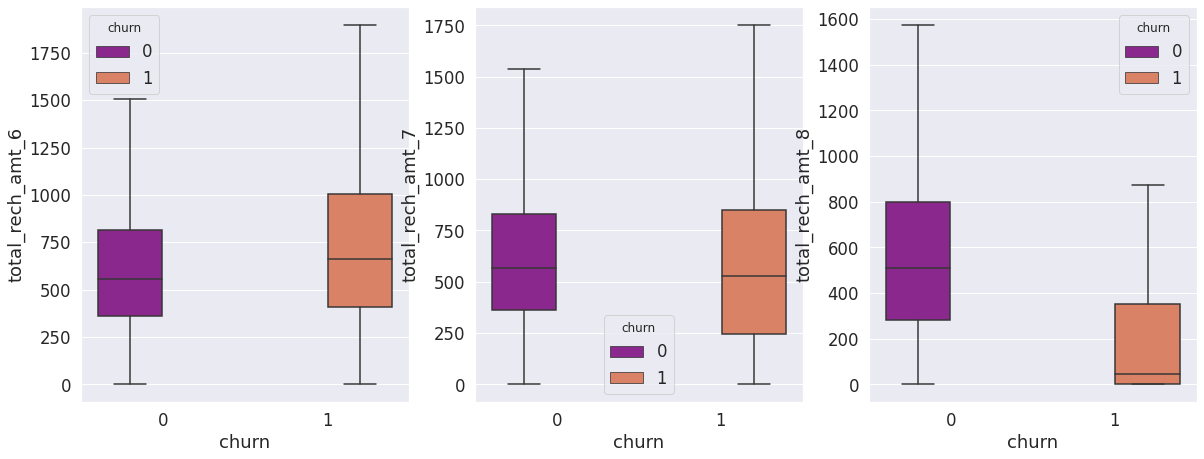

In [34]:
# Ploting for total recharge amount:
plot_box_chart('total_rech_amt')

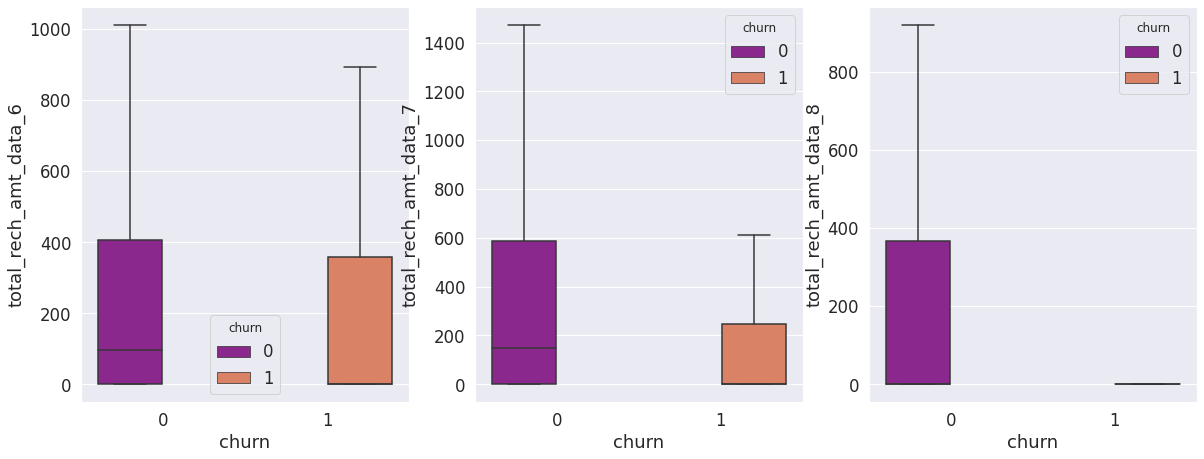

In [36]:
# Ploting for total recharge amount for data:
plot_box_chart('total_rech_amt_data')

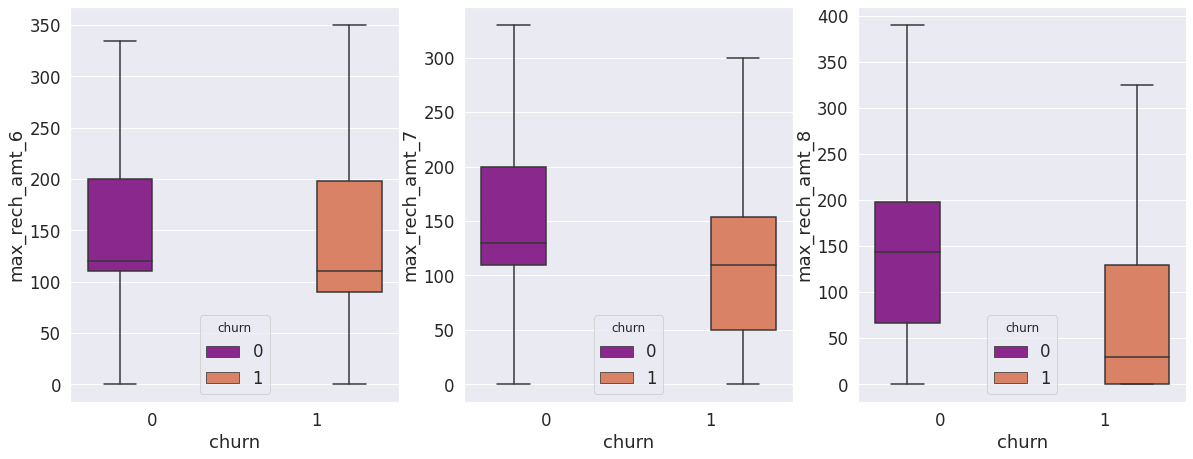

In [37]:
# Ploting for maximum recharge amount for data:
plot_box_chart('max_rech_amt')

In [38]:
telecom_df_high_val_cust.loc[:,['max_rech_data_6','max_rech_data_7','max_rech_data_8']].describe()

,max_rech_data_6,max_rech_data_7,max_rech_data_8
count,16740.000,17038.000,15935.000
mean,139.804,140.445,136.353
std,118.893,120.295,119.571
min,1.000,1.000,1.000
25%,25.000,25.000,25.000
50%,152.000,152.000,152.000
75%,198.000,198.000,198.000
max,1555.000,1555.000,1555.000


In [39]:
telecom_df_high_val_cust.loc[:,['max_rech_data_6','max_rech_data_7','max_rech_data_8']] \
= telecom_df_high_val_cust.loc[:,['max_rech_data_6','max_rech_data_7','max_rech_data_8']].replace(np.nan,0)

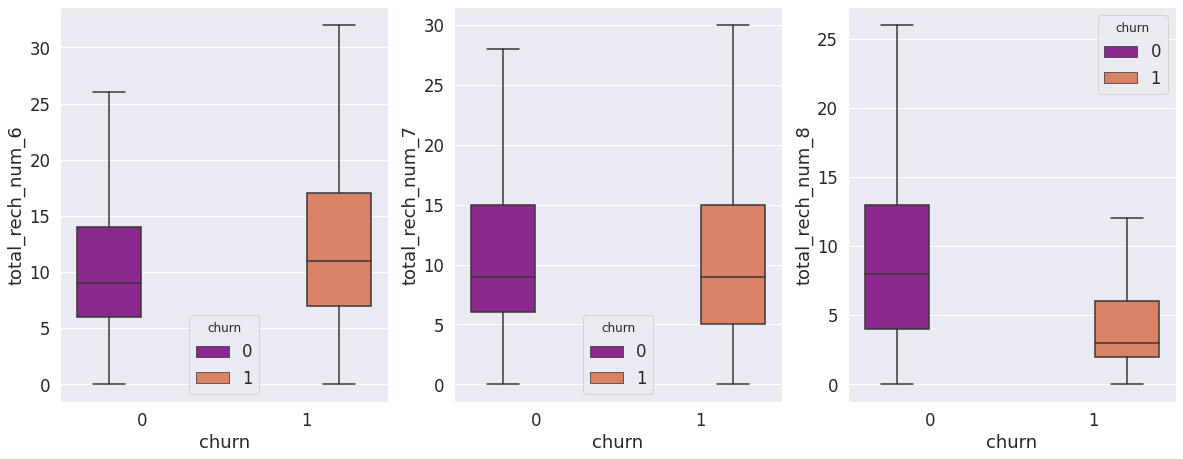

In [40]:
# Ploting for Total recharge for Number:
plot_box_chart('total_rech_num')

    2. 2G/3G related attributes

In [41]:
usage_2g_and_3g = telecom_df_high_val_cust.columns[telecom_df_high_val_cust.columns.str.contains('2g|3g',regex=True)]

In [42]:
display(rstr(telecom_df_high_val_cust[usage_2g_and_3g]))

Data shape: (29953, 34)
___________________________
Data types:
 float64    22
int64      12
Name: types, dtype: int64
___________________________


,types,counts,distincts,nulls,missing ration,uniques
count_rech_2g_6,float64,16740,32,13213,44.112,"[[0.0, nan, 4.0, 2.0, 1.0, 3.0, 7.0, 8.0, 12.0..."
count_rech_2g_7,float64,17038,37,12915,43.118,"[[0.0, nan, 2.0, 5.0, 12.0, 1.0, 7.0, 3.0, 6.0..."
count_rech_2g_8,float64,15935,35,14018,46.800,"[[0.0, nan, 3.0, 1.0, 16.0, 7.0, 2.0, 4.0, 5.0..."
count_rech_3g_6,float64,16740,26,13213,44.112,"[[1.0, nan, 5.0, 0.0, 3.0, 2.0, 8.0, 4.0, 6.0,..."
count_rech_3g_7,float64,17038,29,12915,43.118,"[[1.0, nan, 0.0, 2.0, 8.0, 4.0, 3.0, 5.0, 20.0..."
count_rech_3g_8,float64,15935,30,14018,46.800,"[[1.0, nan, 0.0, 2.0, 3.0, 5.0, 7.0, 4.0, 23.0..."
vol_2g_mb_6,float64,29953,11303,0,0.000,"[[30.13, 0.0, 87.05, 0.27, 516.34, 94.09, 360...."
vol_2g_mb_7,float64,29953,11220,0,0.000,"[[1.32, 0.0, 356.0, 0.48, 57.76, 216.86, 22.65..."
vol_2g_mb_8,float64,29953,10197,0,0.000,"[[5.75, 0.0, 0.03, 0.01, 7.97, 603.58, 16.46, ..."
vol_3g_mb_6,float64,29953,10255,0,0.000,"[[83.57, 0.0, 3509.9, 1530.46, 3144.97, 2042.3..."


In [43]:
#removing columns where missing ratio is more than 40%
telecom_df_high_val_cust.drop(['count_rech_2g_6','count_rech_2g_7',
              'count_rech_2g_8','count_rech_3g_6','count_rech_3g_7','count_rech_3g_8'
               ,'arpu_3g_6','arpu_3g_7','arpu_3g_8','arpu_2g_6','arpu_2g_7','arpu_2g_8'],axis=1,inplace=True)

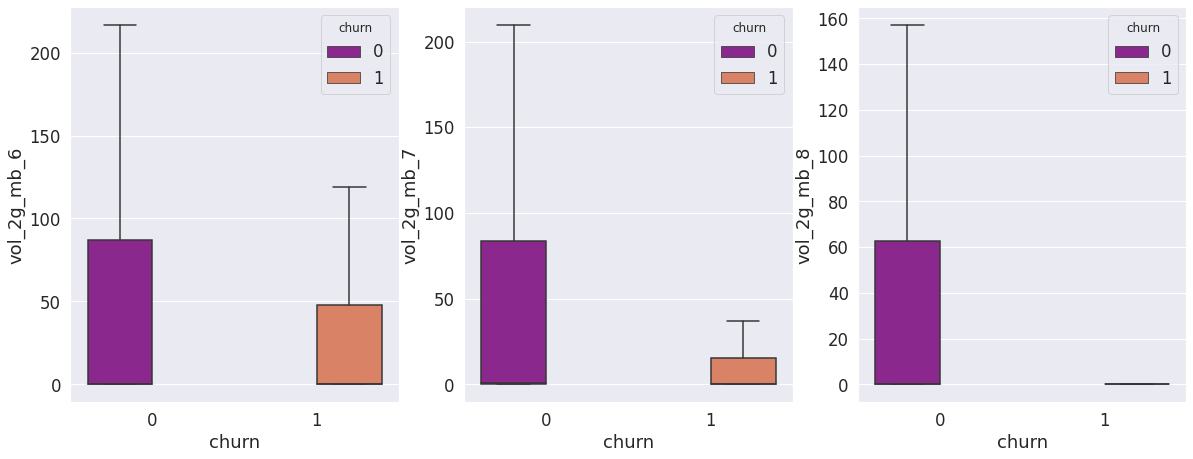

In [44]:
plot_box_chart('vol_2g_mb')

In [45]:
# Renaming month named vbc columns to 6,7,8,9 format
telecom_df_high_val_cust.rename(columns={'jun_vbc_3g':'vbc_3g_6','jul_vbc_3g':'vbc_3g_7','aug_vbc_3g':'vbc_3g_8'
                         ,'sep_vbc_3g':'vbc_3g_9'}, inplace=True)

# drop 9th month column as it is not needed
telecom_df_high_val_cust.drop('vbc_3g_9',axis=1,inplace=True)

 3.Minutes of usage - voice calls

In [46]:
mou_cols = telecom_df_high_val_cust.columns[telecom_df_high_val_cust.columns.str.contains('mou')]

In [ ]:
mou_cols 

Index(['onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6',
       'offnet_mou_7', 'offnet_mou_8', 'roam_ic_mou_6', 'roam_ic_mou_7',
       'roam_ic_mou_8', 'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8',
       'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8',
       'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8',
       'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8',
       'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8',
       'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'std_og_t2t_mou_6',
       'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2m_mou_6',
       'std_og_t2m_mou_7', 'std_og_t2m_mou_8', 'std_og_t2f_mou_6',
       'std_og_t2f_mou_7', 'std_og_t2f_mou_8', 'std_og_mou_6', 'std_og_mou_7',
       'std_og_mou_8', 'isd_og_mou_6', 'isd_og_mou_7', 'isd_og_mou_8',
       'spl_og_mou_6', 'spl_og_mou_7', 'spl_og_mou_8', 'total_og_mou_6',
       'total_og_mou_7', 'total_og_mou_8', 'loc_ic_t2t_mou_6',
       'loc_ic_t2t_mo

In [47]:
display(rstr(telecom_df_high_val_cust[mou_cols]))

Data shape: (29953, 81)
___________________________
Data types:
 float64    81
Name: types, dtype: int64
___________________________


,types,counts,distincts,nulls,missing ration,uniques
onnet_mou_6,float64,29411,16873,542,1.810,"[[nan, 57.84, 413.69, 102.41, 48.96, 0.0, 248...."
onnet_mou_7,float64,29417,16974,536,1.789,"[[nan, 54.68, 351.03, 132.11, 50.66, 0.0, 619...."
onnet_mou_8,float64,28781,15855,1172,3.913,"[[0.0, 52.29, 35.08, 85.14, 33.58, 666.38, 80...."
offnet_mou_6,float64,29411,21199,542,1.810,"[[nan, 453.43, 94.66, 757.93, 85.41, 0.0, 88.8..."
offnet_mou_7,float64,29417,21234,536,1.789,"[[nan, 567.16, 80.63, 896.68, 89.36, 0.0, 50.5..."
offnet_mou_8,float64,28781,20141,1172,3.913,"[[0.0, 325.91, 136.48, 983.39, 205.89, 97.81, ..."
roam_ic_mou_6,float64,29411,4046,542,1.810,"[[nan, 16.23, 0.0, 3.06, 91.03, 11.66, 9.06, 2..."
roam_ic_mou_7,float64,29417,3382,536,1.789,"[[nan, 33.49, 0.0, 1.31, 14.56, 188.34, 6.43, ..."
roam_ic_mou_8,float64,28781,3432,1172,3.913,"[[0.0, 31.64, 73.19, nan, 16.86, 7.09, 2.36, 7..."
roam_og_mou_6,float64,29411,4743,542,1.810,"[[nan, 23.74, 0.0, 2.28, 306.66, 11.18, 1.31, ..."


In [50]:
# replaceing null values by 0 for minutes of usage variables
telecom_df_high_val_cust.loc[:,mou_cols] = telecom_df_high_val_cust.loc[:,mou_cols].replace(np.NaN,0)

In [48]:
mou_og_cols6 = telecom_df_high_val_cust.columns[telecom_df_high_val_cust.columns.str.contains('.*_og_.*mou_6',regex=True)]

In [49]:
telecom_df_high_val_cust.loc[:,mou_og_cols6].describe()

,roam_og_mou_6,loc_og_t2t_mou_6,loc_og_t2m_mou_6,loc_og_t2f_mou_6,loc_og_t2c_mou_6,loc_og_mou_6,std_og_t2t_mou_6,std_og_t2m_mou_6,std_og_t2f_mou_6,std_og_mou_6,isd_og_mou_6,spl_og_mou_6,total_og_mou_6
count,29411.000,29411.000,29411.000,29411.000,29411.000,29411.000,29411.000,29411.000,29411.000,29411.000,29411.000,29411.000,29953.000
mean,27.086,86.133,166.319,6.465,1.606,258.926,168.955,182.746,1.840,353.545,2.215,5.932,610.058
std,117.284,230.772,251.521,22.326,6.362,380.428,407.062,412.164,12.096,612.587,46.309,17.723,691.178
min,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,0.000,5.030,21.130,0.000,0.000,35.980,0.000,0.000,0.000,0.710,0.000,0.000,116.640
50%,0.000,25.590,80.340,0.110,0.000,129.480,3.360,18.160,0.000,50.710,0.000,0.310,410.630
75%,0.000,79.870,212.485,4.380,0.000,337.485,116.650,160.585,0.000,477.335,0.000,5.390,859.030
max,3775.110,6431.330,4729.740,1466.030,271.440,10643.380,7366.580,8314.760,628.560,8432.990,5900.660,1023.210,10674.030


In [51]:
telecom_df_high_val_cust.filter(mou_og_cols6).corr()

,roam_og_mou_6,loc_og_t2t_mou_6,loc_og_t2m_mou_6,loc_og_t2f_mou_6,loc_og_t2c_mou_6,loc_og_mou_6,std_og_t2t_mou_6,std_og_t2m_mou_6,std_og_t2f_mou_6,std_og_mou_6,isd_og_mou_6,spl_og_mou_6,total_og_mou_6
roam_og_mou_6,1.000,-0.027,-0.056,-0.018,-0.009,-0.055,-0.012,0.009,-0.003,-0.002,-0.006,-0.033,-0.033
loc_og_t2t_mou_6,-0.027,1.000,0.220,0.058,0.031,0.753,-0.045,-0.036,0.006,-0.054,-0.002,0.023,0.366
loc_og_t2m_mou_6,-0.056,0.220,1.000,0.182,0.017,0.805,-0.081,-0.042,0.055,-0.081,0.004,0.033,0.371
loc_og_t2f_mou_6,-0.018,0.058,0.182,1.000,-0.003,0.214,-0.063,-0.049,0.149,-0.072,0.012,0.024,0.055
loc_og_t2c_mou_6,-0.009,0.031,0.017,-0.003,1.000,0.030,0.046,0.042,0.003,0.059,0.001,0.489,0.081
loc_og_mou_6,-0.055,0.753,0.805,0.214,0.030,1.000,-0.084,-0.052,0.049,-0.090,0.002,0.037,0.470
std_og_t2t_mou_6,-0.012,-0.045,-0.081,-0.063,0.046,-0.084,1.000,0.122,-0.027,0.745,-0.015,0.103,0.612
std_og_t2m_mou_6,0.009,-0.036,-0.042,-0.049,0.042,-0.052,0.122,1.000,0.000,0.753,-0.015,0.096,0.636
std_og_t2f_mou_6,-0.003,0.006,0.055,0.149,0.003,0.049,-0.027,0.000,1.000,0.002,0.002,0.009,0.029
std_og_mou_6,-0.002,-0.054,-0.081,-0.072,0.059,-0.090,0.745,0.753,0.002,1.000,-0.020,0.133,0.834


total_ic_mou_6, std_ic_mou_6 and loc_ic_mou_6 seems to have strong correlation with other fileds 

In [52]:
#removing mou columns from the datset

list_total_ic_cols = telecom_df_high_val_cust.columns[telecom_df_high_val_cust.columns.str.contains('total_ic_mou|std_ic_mou|loc_ic_mou',regex=True)]
telecom_df_high_val_cust.drop(list_total_ic_cols,axis=1,inplace=True)
print("Columns dropped - ")
list_total_ic_cols.tolist()

Columns dropped - 


['loc_ic_mou_6',
 'loc_ic_mou_7',
 'loc_ic_mou_8',
 'std_ic_mou_6',
 'std_ic_mou_7',
 'std_ic_mou_8',
 'total_ic_mou_6',
 'total_ic_mou_7',
 'total_ic_mou_8']

4.tenure analysis

In [53]:
tenure_data = telecom_df_high_val_cust.copy()

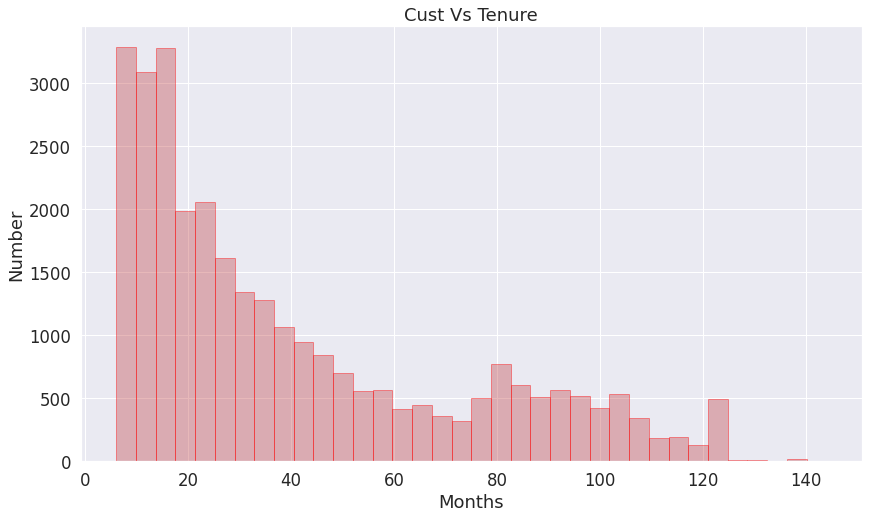

In [54]:
plt.figure(figsize=(14,8))
# aon --> Age on network - number of days the customer is using the operator T network
tenure_data['tenure'] = tenure_data['aon']/30
tenure_data['tenure'].head()
ax = sns.distplot(tenure_data['tenure'], hist=True, kde=False, 
             bins=int(180/5), color = 'r', 
             hist_kws={'edgecolor':'red'},
             kde_kws={'linewidth': 4})
ax.set_ylabel('Number')
ax.set_xlabel('Months')
ax.set_title('Cust Vs Tenure')
plt.show()

In [55]:
tn_range = [0, 6, 12, 24, 60, 61]
tn_label = [ '0-6 Months', '6-12 Months', '1-2 Yrs', '2-5 Yrs', '5 Yrs and above']
tenure_data['tenure_range'] = pd.cut(tenure_data['tenure'], tn_range, labels=tn_label)
tenure_data['tenure_range'].head()

0         2-5 Yrs
7         2-5 Yrs
8     6-12 Months
21        1-2 Yrs
23        1-2 Yrs
Name: tenure_range, dtype: category
Categories (5, object): [0-6 Months < 6-12 Months < 1-2 Yrs < 2-5 Yrs < 5 Yrs and above]

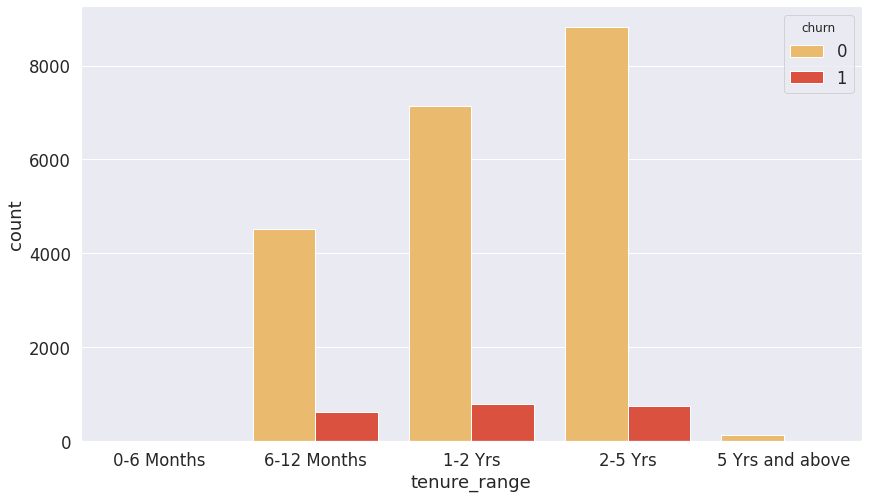

In [56]:
plt.figure(figsize=(14,8))
sns.countplot(x = 'tenure_range', hue = 'churn',data = tenure_data,palette=("YlOrRd"))
plt.show()

In [57]:
#Analysing dataset fore null values
display(rstr(telecom_df_high_val_cust))

Data shape: (29953, 142)
___________________________
Data types:
 float64           109
int64              27
datetime64[ns]      6
Name: types, dtype: int64
___________________________


,types,counts,distincts,nulls,missing ration,uniques
mobile_number,int64,29953,29953,0,0.000,"[[7000842753, 7000701601, 7001524846, 70021242..."
arpu_6,float64,29953,29029,0,0.000,"[[197.385, 1069.18, 378.721, 514.453, 74.35, 9..."
arpu_7,float64,29953,29040,0,0.000,"[[214.81599999999997, 1349.85, 492.223, 597.75..."
arpu_8,float64,29953,28035,0,0.000,"[[213.803, 3171.48, 137.362, 637.76, 366.966, ..."
onnet_mou_6,float64,29953,16872,0,0.000,"[[0.0, 57.84, 413.69, 102.41, 48.96, 248.99, 8..."
onnet_mou_7,float64,29953,16973,0,0.000,"[[0.0, 54.68, 351.03, 132.11, 50.66, 619.96, 1..."
onnet_mou_8,float64,29953,15854,0,0.000,"[[0.0, 52.29, 35.08, 85.14, 33.58, 666.38, 80...."
offnet_mou_6,float64,29953,21198,0,0.000,"[[0.0, 453.43, 94.66, 757.93, 85.41, 88.86, 23..."
offnet_mou_7,float64,29953,21233,0,0.000,"[[0.0, 567.16, 80.63, 896.68, 89.36, 50.58, 28..."
offnet_mou_8,float64,29953,20140,0,0.000,"[[0.0, 325.91, 136.48, 983.39, 205.89, 97.81, ..."


In [58]:
#dropping columns whose missing ratio is more than 30%
col_to_drop = ['date_of_last_rech_data_8',
'night_pck_user_8',
'fb_user_8',
'date_of_last_rech_data_6',
'night_pck_user_6',
'fb_user_6',
'date_of_last_rech_data_7',
               'date_of_last_rech_data_8',
'night_pck_user_7',
'fb_user_7']

In [59]:
telecom_df_high_val_cust.drop(telecom_df_high_val_cust[col_to_drop],axis=1,inplace=True)

In [60]:
telecom_df_high_val_cust.shape

(29953, 133)

In [61]:
#Analysing dataset after removal of columns
display(rstr(telecom_df_high_val_cust))

Data shape: (29953, 133)
___________________________
Data types:
 float64           103
int64              27
datetime64[ns]      3
Name: types, dtype: int64
___________________________


,types,counts,distincts,nulls,missing ration,uniques
mobile_number,int64,29953,29953,0,0.000,"[[7000842753, 7000701601, 7001524846, 70021242..."
arpu_6,float64,29953,29029,0,0.000,"[[197.385, 1069.18, 378.721, 514.453, 74.35, 9..."
arpu_7,float64,29953,29040,0,0.000,"[[214.81599999999997, 1349.85, 492.223, 597.75..."
arpu_8,float64,29953,28035,0,0.000,"[[213.803, 3171.48, 137.362, 637.76, 366.966, ..."
onnet_mou_6,float64,29953,16872,0,0.000,"[[0.0, 57.84, 413.69, 102.41, 48.96, 248.99, 8..."
onnet_mou_7,float64,29953,16973,0,0.000,"[[0.0, 54.68, 351.03, 132.11, 50.66, 619.96, 1..."
onnet_mou_8,float64,29953,15854,0,0.000,"[[0.0, 52.29, 35.08, 85.14, 33.58, 666.38, 80...."
offnet_mou_6,float64,29953,21198,0,0.000,"[[0.0, 453.43, 94.66, 757.93, 85.41, 88.86, 23..."
offnet_mou_7,float64,29953,21233,0,0.000,"[[0.0, 567.16, 80.63, 896.68, 89.36, 50.58, 28..."
offnet_mou_8,float64,29953,20140,0,0.000,"[[0.0, 325.91, 136.48, 983.39, 205.89, 97.81, ..."


In [62]:
telecom_df_final = telecom_df_high_val_cust.copy()
print(telecom_df_final.shape)
telecom_df_final.head(3)

(29953, 133)


,mobile_number,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,...,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,total_rech_amt_data_6,total_rech_amt_data_7,total_rech_amt_data_8,total_avg_rech_amnt_6_7_GPhase,churn
0,7000842753,197.385,214.816,213.803,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,2014-08-08,252,252,252,1.000,1.000,1.000,252.000,252.000,252.000,252.000,252.000,252.000,30.130,1.320,5.750,83.570,150.760,109.610,0,0,0,0,0,0,1,1,1,0,0,0,968,30.400,0.000,101.200,252.000,252.000,252.000,559.000,1
7,7000701601,1069.180,1349.850,3171.480,57.840,54.680,52.290,453.430,567.160,325.910,16.230,33.490,31.640,23.740,12.590,38.060,51.390,31.380,40.280,308.630,447.380,162.280,62.130,55.140,53.230,0.000,0.000,0.000,422.160,533.910,255.790,4.300,23.290,12.010,49.890,31.760,49.140,6.660,20.080,16.680,...,2014-08-26,0,0,779,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0,0,0,0,0,0,0,0,0,0,0,0,802,57.740,19.380,18.740,0.000,0.000,0.000,1185.000,1
8,7001524846,378.721,492.223,137.362,413.690,351.030,35.080,94.660,80.630,136.480,0.000,0.000,0.000,0.000,0.000,0.000,297.130,217.590,12.490,80.960,70.580,50.540,0.000,0.000,0.000,0.000,0.000,7.150,378.090,288.180,63.040,116.560,133.430,22.580,13.690,10.040,75.690,0.000,0.000,0.000,...,2014-08-30,50,0,10,0.000,2.000,3.000,0.000,154.000,23.000,0.000,177.000,69.000,0.000,356.000,0.030,0.000,750.950,11.940,0,1,0,0,1,3,0,0,0,0,0,0,315,21.030,910.650,122.160,0.000,354.000,138.000,696.000,0


In [63]:
telecom_df_final.drop(["total_avg_rech_amnt_6_7_GPhase"],axis=1,inplace=True)
telecom_df_final.drop(telecom_df_high_val_cust.filter(regex='date_').columns,axis=1,inplace=True)
print (telecom_df_final.shape)

col_list = telecom_df_final.filter(regex='_6|_7').columns.str[:-2]
for idx, col in enumerate(col_list.unique()):
    print(col)
    avg_col_name = "avg_"+col+"_av67"
    col_6 = col+"_6"
    col_7 = col+"_7"
    telecom_df_final[avg_col_name] = (telecom_df_final[col_6]  + telecom_df_final[col_7])/ 2

(29953, 129)
arpu
onnet_mou
offnet_mou
roam_ic_mou
roam_og_mou
loc_og_t2t_mou
loc_og_t2m_mou
loc_og_t2f_mou
loc_og_t2c_mou
loc_og_mou
std_og_t2t_mou
std_og_t2m_mou
std_og_t2f_mou
std_og_mou
isd_og_mou
spl_og_mou
og_others
total_og_mou
loc_ic_t2t_mou
loc_ic_t2m_mou
loc_ic_t2f_mou
std_ic_t2t_mou
std_ic_t2m_mou
std_ic_t2f_mou
spl_ic_mou
isd_ic_mou
ic_others
total_rech_num
total_rech_amt
max_rech_amt
last_day_rch_amt
total_rech_data
max_rech_data
av_rech_amt_data
vol_2g_mb
vol_3g_mb
monthly_2g
sachet_2g
monthly_3g
sachet_3g
vbc_3g
total_rech_amt_data


In [64]:
col_list_to_drop = telecom_df_final.filter(regex='_6|_7')
telecom_df_final.drop(col_list_to_drop,axis=1,inplace=True)
print (telecom_df_final.shape)

(29953, 87)


### MODEL BUILDING

#### PCA

In [65]:
telecom_pca_df = telecom_df_final.copy()

In [66]:
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import IncrementalPCA

def split_data(df):
    Y = df["churn"]
    X = df.drop(["churn","mobile_number"],axis=1)
    return X,Y
    
def scale_data(X):
    scaler = StandardScaler()
    X_col = X.columns
    X_scaled = scaler.fit_transform(X)
    X_scale_final = pd.DataFrame(X_scaled, columns=X_col)
    print("Scaling the data ....")
    return X_scale_final

def get_scree_plot(X):
    pca = PCA(svd_solver='randomized', random_state=101)
    pca.fit(X)
    fig = plt.figure(figsize = (8,6))
    plt.plot(np.cumsum(pca.explained_variance_ratio_))
    plt.xlabel('number of components')
    plt.ylabel('cumulative explained variance')
    plt.show()
    
def resampling_data(X,Y,feature_number,train_size=0.7,test_size=0.3) :
    
    x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, train_size=train_size, random_state=1)

    print("Shape of train datatset before : "+str(x_train.shape))
    print("Percenatge of Churned customer data : "+str(round(100*Y.sum()/len(Y),2)))
    print("Applying SMOTE to normalize imbalance ....")

    #Initializing SMOTE: Synthetic Minority Over-sampling Technique
    # using this as data is skewed 
    #smote = SMOTE(kind = "regular")
    
    x_tr,y_tr = SMOTE().fit_sample(x_train,y_train)
    print("Shape of train datatset after SMOTE : "+str(x_tr.shape))

    # Applying PCA : Pricnipal Component Analysis
    pca = IncrementalPCA(n_components=feature_number)    
    x_tr_pca = pca.fit_transform(x_tr)
    #x_tr_pca = pca.fit_transform(x_train)
    x_test_pca = pca.transform(x_test)
    print("Shape of train datatset after PCA : "+str(x_tr_pca.shape))

    return x_tr_pca,x_test_pca,y_tr,y_test
    #return x_tr_pca,x_test_pca,y_train,y_test

In [67]:
X,Y=split_data(telecom_pca_df)

In [68]:
print("Percenatge of Churned Customer data : "+str(round(100*Y.sum()/len(Y),2)))

Percenatge of Churned Customer data : 8.12


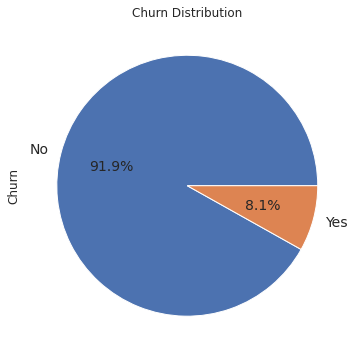

In [69]:
#Churn Distribution
pie_chart = telecom_pca_df['churn'].value_counts()*100.0 /len(telecom_pca_df)
ax = pie_chart.plot.pie(autopct='%.1f%%', labels = ['No', 'Yes'],figsize =(8,6), fontsize = 14 )                                                                           
ax.set_ylabel('Churn',fontsize = 12)
ax.set_title('Churn Distribution', fontsize = 12)
plt.show()

In [70]:
X_scaled = scale_data(X)
print(X_scaled.shape)
X_scaled.head(5)

Scaling the data ....
(29953, 85)


,arpu_8,onnet_mou_8,offnet_mou_8,roam_ic_mou_8,roam_og_mou_8,loc_og_t2t_mou_8,loc_og_t2m_mou_8,loc_og_t2f_mou_8,loc_og_t2c_mou_8,loc_og_mou_8,std_og_t2t_mou_8,std_og_t2m_mou_8,std_og_t2f_mou_8,std_og_mou_8,isd_og_mou_8,spl_og_mou_8,og_others_8,total_og_mou_8,loc_ic_t2t_mou_8,loc_ic_t2m_mou_8,loc_ic_t2f_mou_8,std_ic_t2t_mou_8,std_ic_t2m_mou_8,std_ic_t2f_mou_8,spl_ic_mou_8,isd_ic_mou_8,ic_others_8,total_rech_num_8,total_rech_amt_8,max_rech_amt_8,last_day_rch_amt_8,total_rech_data_8,max_rech_data_8,av_rech_amt_data_8,vol_2g_mb_8,vol_3g_mb_8,monthly_2g_8,sachet_2g_8,monthly_3g_8,sachet_3g_8,...,avg_offnet_mou_av67,avg_roam_ic_mou_av67,avg_roam_og_mou_av67,avg_loc_og_t2t_mou_av67,avg_loc_og_t2m_mou_av67,avg_loc_og_t2f_mou_av67,avg_loc_og_t2c_mou_av67,avg_loc_og_mou_av67,avg_std_og_t2t_mou_av67,avg_std_og_t2m_mou_av67,avg_std_og_t2f_mou_av67,avg_std_og_mou_av67,avg_isd_og_mou_av67,avg_spl_og_mou_av67,avg_og_others_av67,avg_total_og_mou_av67,avg_loc_ic_t2t_mou_av67,avg_loc_ic_t2m_mou_av67,avg_loc_ic_t2f_mou_av67,avg_std_ic_t2t_mou_av67,avg_std_ic_t2m_mou_av67,avg_std_ic_t2f_mou_av67,avg_spl_ic_mou_av67,avg_isd_ic_mou_av67,avg_ic_others_av67,avg_total_rech_num_av67,avg_total_rech_amt_av67,avg_max_rech_amt_av67,avg_last_day_rch_amt_av67,avg_total_rech_data_av67,avg_max_rech_data_av67,avg_av_rech_amt_data_av67,avg_vol_2g_mb_av67,avg_vol_3g_mb_av67,avg_monthly_2g_av67,avg_sachet_2g_av67,avg_monthly_3g_av67,avg_sachet_3g_av67,avg_vbc_3g_av67,avg_total_rech_amt_data_av67
0,-0.588,-0.511,-0.695,-0.169,-0.190,-0.343,-0.649,-0.302,-0.238,-0.649,-0.373,-0.385,-0.145,-0.505,-0.044,-0.323,-0.017,-0.788,-0.393,-0.661,-0.306,-0.195,-0.270,-0.129,-0.240,-0.156,-0.096,-0.860,-0.544,0.530,1.099,-0.208,1.622,0.663,-0.320,-0.263,-0.378,-0.416,1.277,-0.184,...,-0.821,-0.218,-0.250,-0.383,-0.703,-0.305,-0.267,-0.711,-0.441,-0.466,-0.158,-0.610,-0.048,-0.373,-0.143,-0.950,-0.420,-0.730,-0.353,-0.202,-0.319,-0.153,-0.268,-0.155,-0.097,-0.960,-0.687,0.526,1.305,-0.282,1.676,0.641,-0.367,-0.286,-0.461,-0.472,1.358,-0.231,-0.301,-0.194
1,5.303,-0.397,-0.019,0.258,0.173,-0.166,0.045,2.426,-0.238,0.055,-0.343,-0.264,1.380,-0.377,0.180,-0.002,-0.017,-0.288,-0.222,-0.117,0.580,0.231,1.097,0.987,-0.240,0.291,1.088,-0.321,4.993,8.193,4.727,-0.541,-0.656,-0.625,-0.338,-0.383,-0.378,-0.416,-0.342,-0.184,...,0.293,0.158,-0.056,-0.197,0.925,2.492,-0.267,0.623,-0.405,-0.363,1.001,-0.493,-0.046,-0.244,-0.143,-0.109,-0.133,0.330,2.504,0.122,0.842,2.258,0.429,-0.042,1.029,-0.786,1.017,6.573,-0.868,-0.651,-0.765,-0.743,-0.420,-0.425,-0.461,-0.472,-0.391,-0.231,-0.381,-0.398
2,-0.740,-0.434,-0.412,-0.169,-0.190,-0.289,-0.433,-0.302,0.762,-0.475,-0.317,-0.200,-0.145,-0.343,-0.044,0.181,-0.017,-0.543,-0.392,-0.609,-0.333,-0.194,-0.264,-0.129,-0.240,-0.156,-0.096,0.434,-0.760,-0.751,-0.568,0.459,-0.448,-0.272,-0.338,-0.370,-0.378,0.766,-0.342,-0.184,...,-0.630,-0.218,-0.250,0.774,-0.376,-0.305,-0.267,0.219,-0.117,-0.436,-0.158,-0.375,-0.048,-0.373,-0.143,-0.229,-0.313,-0.557,-0.353,-0.198,-0.178,-0.153,-0.268,-0.155,-0.097,0.951,-0.276,-0.316,-0.652,-0.282,-0.019,-0.257,0.174,0.021,0.828,-0.265,-0.391,-0.231,0.884,-0.255
3,0.257,-0.325,1.345,-0.169,-0.190,-0.241,-0.201,-0.221,-0.238,-0.292,-0.218,1.759,-0.145,1.036,-0.044,-0.323,-0.017,0.737,-0.271,-0.080,-0.093,-0.192,0.714,-0.129,-0.240,-0.156,-0.096,1.835,0.218,-0.636,-0.292,-0.541,-0.656,-0.625,-0.338,-0.383,-0.378,-0.416,-0.342,-0.184,...,0.986,-0.218,-0.250,-0.359,-0.316,-0.287,-0.267,-0.444,-0.151,1.404,-0.158,0.846,-0.048,-0.373,-0.143,0.499,-0.380,-0.264,-0.269,-0.068,0.244,-0.153,-0.268,-0.155,-0.097,1.414,-0.041,-0.783,-0.652,-0.651,-0.765,-0.743,-0.420,-0.425,-0.461,-0.472,-0.391,-0.231,-0.430,-0.398
4,-0.283,-0.438,-0.268,-0.169,-0.190,-0.196,-0.014,-0.302,2.240,-0.148,-0.373,-0.288,-0.145,-0.440,-0.044,0.550,-0.017,-0.446,0.088,0.002,-0.316,-0.008,0.155,-0.129,-0.240,-0.103,0.925,-0.644,-0.238,0.108,-0.636,0.126,0.962,0.755,-0.338,0.716,-0.378,-0.416,1.277,0.725,...,-0.630,-0.218,-0.250,-0.159,-0.345,-0.305,-0.267

In [71]:
# Use PCA
#selectedtelecomdata_final_dropmobile = selectedtelecomdata_final_dropmobile.reset_index()
pca = PCA(svd_solver="randomized", random_state=42)
pca.fit(X_scaled)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
    svd_solver='randomized', tol=0.0, whiten=False)

In [72]:
pca.components_

array([[ 1.67350899e-01,  1.85479503e-01,  2.05337225e-01, ...,
        -6.94835545e-02, -1.00504627e-01, -1.33199373e-01],
       [ 2.08460609e-01,  1.49009967e-02,  7.86095578e-02, ...,
         3.61403758e-02,  1.90414157e-01,  1.18333382e-01],
       [ 8.58799146e-02,  1.17594361e-01,  5.58238143e-02, ...,
         1.51346851e-01,  4.71351519e-02,  2.19606356e-01],
       ...,
       [-2.38173925e-07, -1.55584477e-06, -1.75829833e-06, ...,
         7.05970496e-08,  5.21489776e-08, -1.10388947e-07],
       [ 1.94759287e-16,  4.50131302e-16, -1.27727973e-16, ...,
        -2.24415537e-01,  1.52655666e-16, -9.71445147e-17],
       [ 0.00000000e+00,  8.76035355e-16,  7.42758715e-16, ...,
         1.07222495e-01,  2.77555756e-17, -5.55111512e-17]])

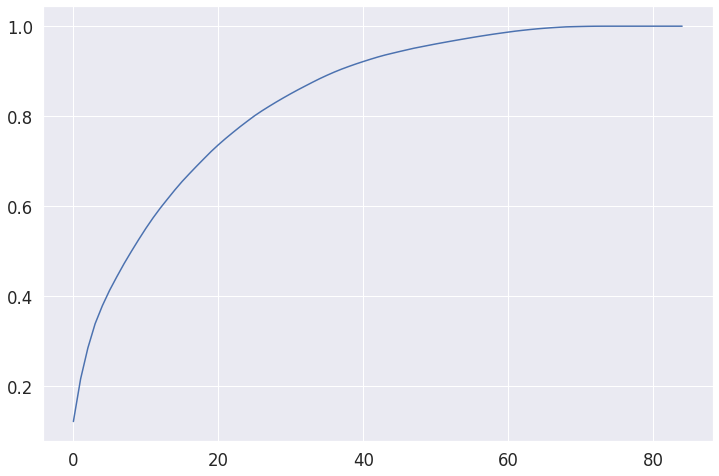

In [73]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.show()

In [74]:
df_pca = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1], 'PC3':pca.components_[2],'Feature':col})
df_pca.head(10)

,PC1,PC2,PC3,Feature
0,0.167,0.208,0.086,total_rech_amt_data
1,0.185,0.015,0.118,total_rech_amt_data
2,0.205,0.079,0.056,total_rech_amt_data
3,0.020,0.025,0.000,total_rech_amt_data
4,0.041,0.026,0.017,total_rech_amt_data
5,0.095,0.086,-0.068,total_rech_amt_data
6,0.115,0.139,-0.139,total_rech_amt_data
7,0.034,0.093,-0.120,total_rech_amt_data
8,0.027,0.002,0.053,total_rech_amt_data
9,0.135,0.148,-0.138,total_rech_amt_data


In [75]:
np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

array([ 12.06,  21.56,  28.42,  33.81,  37.82,  41.25,  44.28,  47.19,
        49.9 ,  52.51,  55.02,  57.37,  59.55,  61.57,  63.56,  65.44,
        67.17,  68.85,  70.49,  72.11,  73.61,  75.01,  76.34,  77.64,
        78.87,  80.07,  81.15,  82.16,  83.14,  84.08,  84.99,  85.87,
        86.71,  87.54,  88.34,  89.09,  89.8 ,  90.45,  91.05,  91.62,
        92.15,  92.66,  93.15,  93.59,  93.98,  94.37,  94.74,  95.11,
        95.43,  95.75,  96.06,  96.35,  96.64,  96.92,  97.2 ,  97.47,
        97.73,  97.98,  98.23,  98.46,  98.68,  98.9 ,  99.08,  99.25,
        99.41,  99.54,  99.66,  99.76,  99.85,  99.9 ,  99.94,  99.97,
        99.99, 100.  , 100.  , 100.  , 100.  , 100.  , 100.  , 100.  ,
       100.  , 100.  , 100.  , 100.  , 100.  ])

*Looks* like 50 components are enough to describe 95% of the variance in the dataset.We'll choose 60 components for our modeling

In [76]:
x_train, x_test, y_train, y_test = resampling_data(X_scaled,Y,50)

Shape of train datatset before : (20967, 85)
Percenatge of Churned customer data : 8.12
Applying SMOTE to normalize imbalance ....
Shape of train datatset after SMOTE : (38528, 85)
Shape of train datatset after PCA : (38528, 50)


In [77]:
def get_regression_data(df):
    X,Y=split_data(df)
    x_train, x_test, y_train, y_test = resampling_data(scale_data(X),Y,60)
    return x_train, x_test, y_train, y_test

from sklearn.preprocessing import scale
from sklearn import svm
from sklearn import metrics
import itertools
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold,GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, precision_recall_curve, auc, roc_auc_score, roc_curve, recall_score, classification_report
from sklearn.metrics import recall_score,precision_score,roc_auc_score,f1_score,accuracy_score,confusion_matrix

consolidate_summary = pd.DataFrame()

def plot_confusion_matrix(cm):
    """
    This function prints and plots the confusion matrix.
    """
    classes=[0,1]
    cmap=plt.cm.Blues
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title('Confusion matrix')
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
def get_svm_model_stats(x_train, x_test, y_train, y_test,kernel): 
    model = svm.SVC(kernel=kernel) # build model
    model.fit(x_train, y_train) # fit model
    predictions = model.predict(x_test) # print
    accuracy_score = round(metrics.accuracy_score(y_true=y_test, y_pred=predictions),2)
    print("Model selected - "+kernel.upper()+" and accuracy score for kernal is "+str(accuracy_score*100))
    model_name = "SVM (Default)-"+kernel
    print_model_metrics(y_test,predictions,model_name)
    
def display_hyper_stats(cv_results,param_value):
    gamma = cv_results[cv_results['param_gamma']==param_value]
    plt.plot(gamma["param_C"], gamma["mean_test_score"])
    plt.plot(gamma["param_C"], gamma["mean_train_score"])
    plt.xlabel('C')
    plt.ylabel('Accuracy')
    plt.title("Gamma="+str(param_value))
    plt.ylim([0.60, 1])
    plt.legend(['test accuracy', 'train accuracy'], loc='lower right')
    plt.xscale('log')  
    
def print_model_metrics(y_test,y_pred,model_name):
    print(model_name+" Model Stats Scores Summary : ")
    cp = confusion_matrix(y_test,y_pred)
    plt.figure()
    plot_confusion_matrix(cp)
    plt.show()
    
    accuracy = round(accuracy_score(y_test,y_pred),2)
    recall = round(recall_score(y_test,y_pred),2)
    precision = round(precision_score(y_test,y_pred),2)
    auc = round(roc_auc_score(y_test,y_pred),2)
    f1 = round(f1_score(y_test,y_pred),2)
    
    data = [[model_name,accuracy,recall,precision,auc,f1]] 
    df = pd.DataFrame(data, columns = ['Model', 'Accuracy','Precision','Recall','AUC','F1'])
    add_to_global_summary(df)
    return df 

def add_to_global_summary(df) :
    global consolidate_summary 
    consolidate_summary = consolidate_summary.append(df,ignore_index=True)

### Logistic Regression

In [78]:
#Training the model on the train data
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

lr = LogisticRegression()
model = lr.fit(x_train,y_train)
#Making prediction on the test data
pred_probs_test = model.predict_proba(x_test)[:,1]
print("Logistic Regression Accurancy : "+"{:2.2}".format(metrics.roc_auc_score(y_test, pred_probs_test)))

Logistic Regression Accurancy : 0.88


#### SVM

In [79]:
telecom_svm_df = telecom_df_final.copy()
x_train, x_test, y_train, y_test = get_regression_data(telecom_svm_df)

Scaling the data ....
Shape of train datatset before : (20967, 85)
Percenatge of Churned customer data : 8.12
Applying SMOTE to normalize imbalance ....
Shape of train datatset after SMOTE : (38528, 85)
Shape of train datatset after PCA : (38528, 60)


In [ ]:
get_svm_model_stats(x_train, x_test, y_train, y_test,"linear")

In [ ]:
get_svm_model_stats(x_train,x_test, y_train, y_test,"rbf")

### Tuning Hyperparameters for SVM

In [ ]:
# creating a KFold object with 5 splits 
#below code didnt run.its taking time, 
'''folds = KFold(n_splits = 5, shuffle = True, random_state = 101)

# Set the parameters by cross-validation
hyper_params = [ {'gamma': [1e-1,1e-2, 1e-3, 1e-4], 'C': [1, 10, 100, 1000]}]

# specify model
#model = svm.SVC(kernel="rbf")

# set up GridSearchCV()
model_cv_svm = GridSearchCV(estimator = model, 
                        param_grid = hyper_params, 
                        scoring= 'accuracy', 
                        cv = folds, 
                        n_jobs = -1,
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv_svm.fit(x_train, y_train)  '''

In [ ]:
# cv results
'''svm_cv_results = pd.DataFrame(model_cv_svm.cv_results_)
svm_cv_results['param_C'] = svm_cv_results['param_C'].astype('int')
gamma=[1e-1,1e-2, 1e-3, 1e-4]
plt.figure(figsize=(16,5))
plt.subplot(141)
display_hyper_stats(svm_cv_results,gamma[0])
plt.subplot(142)
display_hyper_stats(svm_cv_results,gamma[1])
plt.subplot(143)
display_hyper_stats(svm_cv_results,gamma[2])
plt.subplot(144)
display_hyper_stats(svm_cv_results,gamma[3])
plt.show()

In [ ]:
# printing the optimal accuracy score and hyperparameters
'''best_score = model_cv_svm.best_score_
best_hyperparams = model_cv_svm.best_params_

print("The best test score is {0} corresponding to hyperparameters {1}".format(round(best_score,2), best_hyperparams))

In [ ]:
# model with optimal hyperparameters
'''final_svm_model = svm.SVC(C=10, gamma=0.01, kernel="rbf") 

final_svm_model.fit(x_train, y_train)
y_pred = final_svm_model.predict(x_test)

# metrics
print("Max accuracy with SVM (rbf) is "+str(round(metrics.accuracy_score(y_test, y_pred),2)))

In [ ]:
'''print_model_metrics(y_test, y_pred,"SVM( rfb ) [Hyper]")

#### Decison Tree Classifier

In [81]:
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import metrics

import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import plot_importance
from sklearn.tree import DecisionTreeClassifier

In [82]:
# adaboost classifier with max 600 decision trees of depth=2
# learning_rate/shrinkage=1.5

# base estimator
tree = DecisionTreeClassifier(max_depth=2)

# adaboost with the tree as base estimator
adaboost_model_1 = AdaBoostClassifier(
    base_estimator=tree,
    n_estimators=600,
    learning_rate=1.5,
    algorithm="SAMME")

In [83]:
# fit
adaboost_model_1.fit(x_train, y_train)

AdaBoostClassifier(algorithm='SAMME',
                   base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                         class_weight=None,
                                                         criterion='gini',
                                                         max_depth=2,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort='deprecated',
                            

In [84]:
predictions = adaboost_model_1.predict_proba(x_test)
predictions[:10]
# metrics: AUC
metrics.roc_auc_score(y_test, predictions[:,1])

0.859400884039503

In [85]:
# base estimator
tree = DecisionTreeClassifier()

# adaboost with the tree as base estimator
# learning rate is arbitrarily set to 0.6,
ABC = AdaBoostClassifier(
    base_estimator=tree,
    learning_rate=0.6,
    algorithm="SAMME")

In [86]:
from sklearn.model_selection import GridSearchCV
# parameter grid
param_grid = {"base_estimator__max_depth" : [2, 5],
              "n_estimators": [200, 400, 600]
             }
# run grid search
folds = 3
grid_search_ABC = GridSearchCV(ABC, 
                               cv = folds,
                               param_grid=param_grid, 
                               scoring = 'roc_auc', 
                               return_train_score=True,                         
                               verbose = 1)


In [ ]:
# fit 
grid_search_ABC.fit(x_train, y_train)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


In [ ]:
# model performance on test data with chosen hyperparameters
from sklearn import tree
# base estimator
tree = DecisionTreeClassifier(max_depth=?)

# adaboost with the tree as base estimator

ABC = AdaBoostClassifier(
    base_estimator=tree,
    learning_rate=0.6,
    n_estimators=?,
    algorithm="SAMME")

ABC.fit(X_train, Y_train)

In [ ]:
# predict on test data
predictions = ABC.predict_proba(X_test)
predictions[:10]
# roc auc
metrics.roc_auc_score(Y_test, predictions[:, 1])

#### XGB Classifier

In [ ]:
model = XGBClassifier()
model.fit(x_train, y_train)

In [ ]:
y_pred = model.predict_proba(X_test)
y_pred[:10]
roc = metrics.roc_auc_score(Y_test, y_pred[:, 1])
print("AUC: %.2f%%" % (roc * 100.0))

In [ ]:
# hyperparameter tuning with XGBoost

# creating a KFold object 
folds = 3

# specify range of hyperparameters
param_grid = {'learning_rate': [0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9]}          


# specify model
xgb_model = XGBClassifier(max_depth=2, n_estimators=200)

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = xgb_model, 
                        param_grid = param_grid, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)  

In [ ]:
model_cv.fit(x_train, y_train) 

In [ ]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

In [ ]:
# convert parameters to int for plotting on x-axis
cv_results['param_learning_rate'] = cv_results['param_learning_rate'].astype('float')

In [ ]:
# # plotting
plt.figure(figsize=(16,6))

param_grid = {'learning_rate': [0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9]} 


for n, subsample in enumerate(param_grid['subsample']):
    

    # subplot 1/n
    plt.subplot(1,len(param_grid['subsample']), n+1)
    df = cv_results[cv_results['param_subsample']==subsample]

    plt.plot(df["param_learning_rate"], df["mean_test_score"])
    plt.plot(df["param_learning_rate"], df["mean_train_score"])
    plt.xlabel('learning_rate')
    plt.ylabel('AUC')
    plt.title("subsample={0}".format(subsample))
    plt.ylim([0.60, 1])
    plt.legend(['test score', 'train score'], loc='upper left')
    plt.xscale('log')

In [ ]:
# chosen hyperparameters
# 'objective':'binary:logistic' outputs probability rather than label, which we need for auc
params = {'learning_rate': 0.2,
          'max_depth': 2, 
          'n_estimators':200,
          'subsample':0.6,
         'objective':'binary:logistic'}

# fit model on training data
model = XGBClassifier(params = params)
model.fit(X_train, Y_train)

In [ ]:
# predict
y_pred = model.predict_proba(X_test)
y_pred[:10]
# roc_auc
auc = sklearn.metrics.roc_auc_score(Y_test, y_pred[:, 1])
auc

In [ ]:
#See which model is having highest accuracy ??

Model Summary


#Refer the Model's Summary

*   Logistic			88.0
*   SVM-Linear			83.0
*  SVM rbf				87.0
*  adaboost			 85.9
*  XGB				  87.42
*  XGB - hyper parameter		87.41





### Calculating Feature importance from the model

In [ ]:
def split_data(X,Y,train_size=0.7,test_size=0.3) :
    
    x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, train_size=train_size, random_state=1)

    print("Shape of train datatset before : "+str(x_train.shape))
    print("Percenatge of Churned customer data : "+str(round(100*Y.sum()/len(Y),2)))
    print("Applying SMOTE to normalize imbalance ....")

    #Initializing SMOTE: Synthetic Minority Over-sampling Technique
    # using this as data is skewed 
    #smote = SMOTE(kind = "regular")
    
    x_tr,y_tr = SMOTE().fit_sample(x_train,y_train)
    print("Shape of train datatset after SMOTE : "+str(x_tr.shape))

    #
    return x_tr,x_test,y_tr,y_test
    

In [ ]:
x_train, x_test, y_train, y_test = split_data(X_scaled,Y)

Shape of train datatset before : (20967, 85)
Percenatge of Churned customer data : 8.12
Applying SMOTE to normalize imbalance ....
Shape of train datatset after SMOTE : (38528, 85)


In [ ]:
model_lr = LogisticRegression()
model_lr = model_lr.fit(x_train,y_train)
#Making prediction on the test data
pred_probs_test_lr = model_lr.predict_proba(x_test)[:,1]
print("Logistic Regression Accurancy : "+"{:2.2}".format(metrics.roc_auc_score(y_test, pred_probs_test)))

Logistic Regression Accurancy : 0.88


In [ ]:
# 'objective':'binary:logistic' outputs probability rather than label, which we need for auc
params = {'learning_rate': 0.3,
          'max_depth': 2, 
          'n_estimators':200,
          'subsample':0.5,
         'objective':'binary:logistic'}

# fit model on training data
model_XGB = XGBClassifier(params = params,max_depth=2, n_estimators=200)
model_XGB.fit(x_train, y_train)

[23:02:12] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { params } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=2,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=200, n_jobs=0, num_parallel_tree=1,
              params={'learning_rate': 0.3, 'max_depth': 2, 'n_estimators': 200,
                      'objective': 'binary:logistic', 'subsample': 0.5},
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [ ]:
# predict
y_pred = model_XGB.predict_proba(x_test)
y_pred[:10]
# roc_auc
auc = sklearn.metrics.roc_auc_score(y_test, y_pred[:, 1])
auc

0.9168017282574067

In [ ]:
importance = dict(zip(x_train.columns, model_XGB.feature_importances_))
importance

{'arpu_8': 0.0030399223,
 'onnet_mou_8': 0.0068709017,
 'offnet_mou_8': 0.0026474993,
 'roam_ic_mou_8': 0.014037597,
 'roam_og_mou_8': 0.09339701,
 'loc_og_t2t_mou_8': 0.0060780863,
 'loc_og_t2m_mou_8': 0.0046460778,
 'loc_og_t2f_mou_8': 0.0036373867,
 'loc_og_t2c_mou_8': 0.0029146965,
 'loc_og_mou_8': 0.0069773495,
 'std_og_t2t_mou_8': 0.0017594508,
 'std_og_t2m_mou_8': 0.0033453875,
 'std_og_t2f_mou_8': 0.0067919623,
 'std_og_mou_8': 0.006393631,
 'isd_og_mou_8': 0.0044709262,
 'spl_og_mou_8': 0.0022658098,
 'og_others_8': 0.0,
 'total_og_mou_8': 0.009618439,
 'loc_ic_t2t_mou_8': 0.008801341,
 'loc_ic_t2m_mou_8': 0.1550443,
 'loc_ic_t2f_mou_8': 0.0050105373,
 'std_ic_t2t_mou_8': 0.0055409167,
 'std_ic_t2m_mou_8': 0.004955468,
 'std_ic_t2f_mou_8': 0.0037451128,
 'spl_ic_mou_8': 0.0100401305,
 'isd_ic_mou_8': 0.0024374928,
 'ic_others_8': 0.002936451,
 'total_rech_num_8': 0.010831022,
 'total_rech_amt_8': 0.15524633,
 'max_rech_amt_8': 0.010241658,
 'last_day_rch_amt_8': 0.022945305,
 

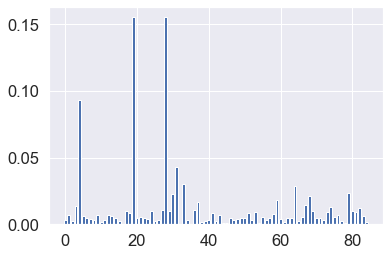

In [ ]:
# plot
plt.bar(range(len(model.feature_importances_)), model.feature_importances_)
plt.show()

#Recommendations ,based upon Logistic regression 
# 
Total Recharge Amount during action phase seems to be most important feature in determining churn prediction.

Local Incoming To Other Mobiles and roaming ti other nobiles are for 8th months are strong indicators of churn behaviour

Incoming and Outgoing Calls on romaing for 8th month are strong indicators of churn behaviour

Total Recharge and Average Recharge Data for 8th Month provides a strong indicator of churn behaviour.
